In [1]:
import azureml.core
import logging

print("SDK version:", azureml.core.VERSION)

from azureml.telemetry import set_diagnostics_collection
set_diagnostics_collection(send_diagnostics=True)

import os
subscription_id = os.getenv("SUBSCRIPTION_ID", default="52f3cf55-fed4-4f7e-9aca-f3da535a03c1")
resource_group = os.getenv("RESOURCE_GROUP", default="automl_rg")
workspace_name = os.getenv("WORKSPACE_NAME", default="automl_ws")
workspace_region = os.getenv("WORKSPACE_REGION", default="eastus2")


from azureml.core import Workspace
from azureml.core.authentication import InteractiveLoginAuthentication

try:
    interactive_auth = InteractiveLoginAuthentication(tenant_id="1591aa04-9c2a-4144-9a04-fb8b0d506de5")
    ws = Workspace(subscription_id = subscription_id, 
               resource_group = resource_group, 
               workspace_name = workspace_name,
               auth=interactive_auth)    # write the details of the workspace to a configuration file to the notebook library
    ws.write_config()
    print("Workspace configuration succeeded.")
except:
    print("Workspace not accessible.")



SDK version: 1.0.45
Turning diagnostics collection on. 
Workspace configuration succeeded.


In [2]:
datasetAlgo_runid={"H_eclipse_2_0_randomforest":"H_eclipse_2_0_randomforest_1561750627559"
,"H_prop_2_randomforest":"H_prop_2_randomforest_1561752068253"
,"H_xalan_2_6_randomforest":"H_xalan_2_6_randomforest_1561752155960"
,"H_eclipse_3_0_randomforest":"H_eclipse_3_0_randomforest_1561752028016"
,"H_camel_1_2_randomforest":"H_camel_1_2_randomforest_1561751966406"
,"H_camel_1_2_xgboost":"H_camel_1_2_xgboost_1561759303507"
,"H_eclipse_2_0_xgboost":"H_eclipse_2_0_xgboost_1561759477871"
,"H_eclipse_3_0_xgboost":"H_eclipse_3_0_xgboost_1561759503753"
,"H_prop_2_xgboost":"H_prop_2_xgboost_1561759543033"
,"H_xalan_2_6_xgboost":"H_xalan_2_6_xgboost_1561758985165"
,"H_camel_1_2_logistic_regression":"H_camel_1_2_logistic_regression_1561823575526"
,"H_eclipse_2_0_logistic_regression":"H_eclipse_2_0_logistic_regression_1561830150555"
,"H_eclipse_3_0_logistic_regression":"H_eclipse_3_0_logistic_regression_1561830205392"
,"H_prop_2_logistic_regression":"H_prop_2_logistic_regression_1561830234009"
,"H_xalan_2_6_logistic_regression":"H_xalan_2_6_logistic_regression_1561830262136"}

dataset_list = ["defect_eclipse_2_0",
"defect_camel_1_2",
"defect_eclipse_3_0",
"defect_prop_2",
"defect_xalan_2_6"]

algo_list = ['xgboost','randomforest','logistic_regression']
algorithm_list = ['xgboost','randomforest','lr']


In [61]:
def calProcessTime(remote_run):
    from dateutil import parser
    delta = parser.parse(remote_run.get_details()['endTimeUtc'])- parser.parse(remote_run.get_details()['startTimeUtc'])
    return delta.seconds/3600

def calElapseTime(remote_run,initalCreateTime):
    from dateutil import parser
    delta = parser.parse(remote_run.get_details()['startTimeUtc'])- parser.parse(initalCreateTime)
    return delta.seconds/3600

In [5]:
from azureml.widgets import RunDetails
from azureml.train.hyperdrive import HyperDriveRun
from azureml.core.experiment import Experiment
h_allrun_map={}

for dataset in dataset_list:
    for algo in algo_list:
        expname = 'H_'+dataset.split('defect_')[1]+'_'+algo
        experiment=Experiment(ws, expname)
        print(datasetAlgo_runid[expname])
        remote_run = HyperDriveRun(experiment = experiment, run_id =datasetAlgo_runid[expname])
        if algo =='logistic_regression': 
            expname = 'H_'+dataset.split('defect_')[1]+'_lr'
        h_allrun_map[expname]=remote_run
 

H_eclipse_2_0_xgboost_1561759477871
H_eclipse_2_0_randomforest_1561750627559
H_eclipse_2_0_logistic_regression_1561830150555
H_camel_1_2_xgboost_1561759303507
H_camel_1_2_randomforest_1561751966406
H_camel_1_2_logistic_regression_1561823575526
H_eclipse_3_0_xgboost_1561759503753
H_eclipse_3_0_randomforest_1561752028016
H_eclipse_3_0_logistic_regression_1561830205392
H_prop_2_xgboost_1561759543033
H_prop_2_randomforest_1561752068253
H_prop_2_logistic_regression_1561830234009
H_xalan_2_6_xgboost_1561758985165
H_xalan_2_6_randomforest_1561752155960
H_xalan_2_6_logistic_regression_1561830262136


In [48]:
remote_run = h_allrun_map['H_prop_2_randomforest']

In [55]:
children[19].get_details_with_logs()

{'runId': 'H_prop_2_randomforest_1561752068253_79',
 'target': 'cpucluster1',
 'status': 'Completed',
 'startTimeUtc': '2019-06-28T21:24:14.141915Z',
 'endTimeUtc': '2019-06-28T21:25:12.826475Z',
 'properties': {'azureml.runsource': 'experiment',
  'ContentSnapshotId': 'c8eaa07f-79eb-4f75-9c19-b56ead02d0a0',
  'AzureML.DerivedImageName': 'azureml/azureml_9f77a2f37e64de8545ecc0848d6c7927'},
 'runDefinition': {'script': 'rf_train.py',
  'arguments': ['--split-random-seeds',
   '42',
   '--data-download-url',
   'https://raw.githubusercontent.com/yiikou/AML_vs_HPT/master/data/defect_prop_2.csv',
   '--dataset-name',
   'defect_prop_2',
   '--output_dir',
   './outputs',
   '--mtry',
   '12'],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'cpucluster1',
  'dataReferences': {},
  'jobName': None,
  'maxRunDurationSeconds': None,
  'nodeCount': 1,
  'environment': {'name': 'Experiment H_prop_2_randomforest Environment',
   'version': 'Auto

In [65]:
h_performance_tb={}

h_all_metrics={}
import warnings; warnings.simplefilter('ignore')

for dataset in dataset_list:
    for algo in algo_list:
        expname = 'H_'+dataset.split('defect_')[1]+'_'+algo
        if algo =='logistic_regression': 
            expname = 'H_'+dataset.split('defect_')[1]+'_lr'
        remote_run = h_allrun_map[expname]
        expCreateTime = remote_run.get_details()['startTimeUtc']
        totalProcessTime = round(calProcessTime(remote_run),2)
        children = list(remote_run.get_children())
        a_metrics = {}
        for run in children:
            if run.status!='Completed' or run.type == 'preparation':
                continue
            iterationNum = run.number
            #print(iterationNum)
            algo = algo
            auc_w = run.get_metrics()['auc_weighted']
            durationT = calProcessTime(run)
            PriorElapseTime = calElapseTime(run,expCreateTime)
            a_metrics[iterationNum] = {'Algorithm':algo,'AUC_weighted':str(round(float(auc_w),6))
                                       ,'Iteration' : iterationNum
                                       ,'TrainTime':str(round(durationT,3))
                                       ,'PriorElapseTime':str(round(PriorElapseTime,3))
                                      }

       

        sorted_performance_index =sorted(a_metrics, key =  lambda kv:a_metrics[kv]['AUC_weighted'],reverse=True)
        top3 = sorted_performance_index[0:3]

        h_all_metrics[expname]=a_metrics
        import pandas as pd
        tb = []
        for index in top3:
            row = a_metrics[index]
            row['Iteration']=index
            tb.append(row)

        df = pd.DataFrame(tb, index = ['Rank 1','Rank 2','Rank 3'])
        #df.columns=['Iteration', 'Algorithm','AUC_weighted','TrainTime','PriorElapseTime']
        h_performance_tb[expname]=df
        print('Hyperparameter Tuning: '+expname+'\n')
        print(df)
        print('\n')

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code E367UB6RA to authenticate.
Interactive authentication successfully completed.


WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_eclipse_2_0_xgboost

       AUC_weighted Algorithm  Iteration PriorElapseTime TrainTime
Rank 1      0.84429   xgboost         30           1.506     0.027
Rank 2     0.843723   xgboost         18           0.659     0.055
Rank 3     0.843482   xgboost         94           4.758     0.051




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_eclipse_2_0_randomforest

       AUC_weighted     Algorithm  Iteration PriorElapseTime TrainTime
Rank 1      0.80006  randomforest         92           1.511     0.009
Rank 2      0.80006  randomforest         87           1.442      0.01
Rank 3      0.80006  randomforest         86            1.44      0.01




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_eclipse_2_0_lr

       AUC_weighted            Algorithm  Iteration PriorElapseTime TrainTime
Rank 1      0.78614  logistic_regression        102           1.504     0.016
Rank 2      0.78614  logistic_regression        101           1.491     0.013
Rank 3      0.78614  logistic_regression        100           1.479     0.015




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_camel_1_2_xgboost

       AUC_weighted Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.664293   xgboost         69           2.808     0.014
Rank 2     0.661568   xgboost         85           3.605     0.012
Rank 3     0.653989   xgboost         17           0.147     0.011




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_camel_1_2_randomforest

       AUC_weighted     Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.651845  randomforest         76           1.261     0.007
Rank 2     0.651845  randomforest         71           1.204     0.006
Rank 3     0.651845  randomforest         58           0.995     0.006




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_camel_1_2_lr

       AUC_weighted            Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.662381  logistic_regression        133           0.522     0.005
Rank 2     0.662381  logistic_regression        132           0.521     0.006
Rank 3     0.662381  logistic_regression        131           0.513     0.006




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_eclipse_3_0_xgboost

       AUC_weighted Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.817156   xgboost         12           0.544     0.094
Rank 2     0.816748   xgboost        102           5.546     0.067
Rank 3     0.816658   xgboost         71           3.963     0.053




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_eclipse_3_0_randomforest

       AUC_weighted     Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.774276  randomforest        100           1.497     0.015
Rank 2     0.774276  randomforest         67           1.121     0.014
Rank 3     0.774276  randomforest         11           0.197     0.014




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_eclipse_3_0_lr

       AUC_weighted            Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.741795  logistic_regression        102           1.507     0.018
Rank 2     0.741795  logistic_regression        101           1.504     0.017
Rank 3     0.741795  logistic_regression        100             1.5     0.017




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_prop_2_xgboost

       AUC_weighted Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.846874   xgboost         74           4.581     0.159
Rank 2     0.845411   xgboost         68           4.189     0.283
Rank 3     0.845154   xgboost         27           1.724     0.118




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_prop_2_randomforest

       AUC_weighted     Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.806944  randomforest         88           1.438     0.016
Rank 2     0.806944  randomforest         83           1.385     0.016
Rank 3     0.806944  randomforest         79           1.349     0.016




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_prop_2_lr

       AUC_weighted            Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.709591  logistic_regression        101           1.553     0.021
Rank 2     0.709591  logistic_regression        102           1.553     0.021
Rank 3     0.709591  logistic_regression        100           1.544      0.02




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_xalan_2_6_xgboost

       AUC_weighted Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.840887   xgboost        117           3.508     0.023
Rank 2     0.837441   xgboost        122           3.704     0.009
Rank 3     0.837326   xgboost         88           2.132     0.023




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_xalan_2_6_randomforest

       AUC_weighted     Algorithm  Iteration PriorElapseTime TrainTime
Rank 1     0.826336  randomforest         72           1.158     0.006
Rank 2     0.826336  randomforest         71           1.153     0.006
Rank 3     0.826336  randomforest         70           1.142     0.007




WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the future
WARNING - Run Number's semantics may be modified in the

Hyperparameter Tuning: H_xalan_2_6_lr

       AUC_weighted            Algorithm  Iteration PriorElapseTime TrainTime
Rank 1      0.78849  logistic_regression        102           1.347     0.007
Rank 2      0.78849  logistic_regression        101           1.329     0.006
Rank 3      0.78849  logistic_regression        100           1.319     0.007




In [64]:
from IPython.display import display, HTML
for expname in h_performance_tb.keys():
        print('Hyperparameter Tuning: '+expname)
        #print(h_performance_tb[expname])
        display(h_performance_tb[expname])
        print('\n')

Hyperparameter Tuning: H_eclipse_2_0_xgboost


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.84429,xgboost,30,1.506,0.027
Rank 2,0.843723,xgboost,18,0.659,0.055
Rank 3,0.843482,xgboost,94,4.758,0.051




Hyperparameter Tuning: H_eclipse_2_0_randomforest


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.80006,randomforest,92,1.511,0.009
Rank 2,0.80006,randomforest,87,1.442,0.01
Rank 3,0.80006,randomforest,86,1.44,0.01




Hyperparameter Tuning: H_eclipse_2_0_lr


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.78614,logistic_regression,102,1.504,0.016
Rank 2,0.78614,logistic_regression,101,1.491,0.013
Rank 3,0.78614,logistic_regression,100,1.479,0.015




Hyperparameter Tuning: H_camel_1_2_xgboost


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.664293,xgboost,69,2.808,0.014
Rank 2,0.661568,xgboost,85,3.605,0.012
Rank 3,0.653989,xgboost,17,0.147,0.011




Hyperparameter Tuning: H_camel_1_2_randomforest


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.651845,randomforest,76,1.261,0.007
Rank 2,0.651845,randomforest,71,1.204,0.006
Rank 3,0.651845,randomforest,58,0.995,0.006




Hyperparameter Tuning: H_camel_1_2_lr


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.662381,logistic_regression,133,0.522,0.005
Rank 2,0.662381,logistic_regression,132,0.521,0.006
Rank 3,0.662381,logistic_regression,131,0.513,0.006




Hyperparameter Tuning: H_eclipse_3_0_xgboost


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.817156,xgboost,12,0.544,0.094
Rank 2,0.816748,xgboost,102,5.546,0.067
Rank 3,0.816658,xgboost,71,3.963,0.053




Hyperparameter Tuning: H_eclipse_3_0_randomforest


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.774276,randomforest,100,1.497,0.015
Rank 2,0.774276,randomforest,67,1.121,0.014
Rank 3,0.774276,randomforest,11,0.197,0.014




Hyperparameter Tuning: H_eclipse_3_0_lr


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.741795,logistic_regression,102,1.507,0.018
Rank 2,0.741795,logistic_regression,101,1.504,0.017
Rank 3,0.741795,logistic_regression,100,1.5,0.017




Hyperparameter Tuning: H_prop_2_xgboost


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.846874,xgboost,74,4.581,0.159
Rank 2,0.845411,xgboost,68,4.189,0.283
Rank 3,0.845154,xgboost,27,1.724,0.118




Hyperparameter Tuning: H_prop_2_randomforest


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.806944,randomforest,88,1.438,0.016
Rank 2,0.806944,randomforest,83,1.385,0.016
Rank 3,0.806944,randomforest,79,1.349,0.016




Hyperparameter Tuning: H_prop_2_lr


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.709591,logistic_regression,101,1.553,0.021
Rank 2,0.709591,logistic_regression,102,1.553,0.021
Rank 3,0.709591,logistic_regression,100,1.544,0.02




Hyperparameter Tuning: H_xalan_2_6_xgboost


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.840887,xgboost,117,3.508,0.023
Rank 2,0.837441,xgboost,122,3.704,0.009
Rank 3,0.837326,xgboost,88,2.132,0.023




Hyperparameter Tuning: H_xalan_2_6_randomforest


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.826336,randomforest,72,1.158,0.006
Rank 2,0.826336,randomforest,71,1.153,0.006
Rank 3,0.826336,randomforest,70,1.142,0.007




Hyperparameter Tuning: H_xalan_2_6_lr


,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.78849,logistic_regression,102,1.347,0.007
Rank 2,0.78849,logistic_regression,101,1.329,0.006
Rank 3,0.78849,logistic_regression,100,1.319,0.007


In [83]:
def extractElapseTime(iteration,all_metrics):
    return float(all_metrics[iteration]['TrainTime'])+float(all_metrics[iteration]['PriorElapseTime'])

In [192]:
all_metrics

{101: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.83586',
  'Iteration': 101,
  'TrainTime': '0.026',
  'PriorElapseTime': '5.124'},
 102: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.843428',
  'Iteration': 102,
  'TrainTime': '0.011',
  'PriorElapseTime': '5.123'},
 100: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.837318',
  'Iteration': 100,
  'TrainTime': '0.077',
  'PriorElapseTime': '5.092'},
 99: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.835818',
  'Iteration': 99,
  'TrainTime': '0.026',
  'PriorElapseTime': '5.066'},
 98: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.824545',
  'Iteration': 98,
  'TrainTime': '0.045',
  'PriorElapseTime': '4.976'},
 97: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.840479',
  'Iteration': 97,
  'TrainTime': '0.051',
  'PriorElapseTime': '4.926'},
 96: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.818431',
  'Iteration': 96,
  'TrainTime': '0.076',
  'PriorElapseTime': '4.882'},
 95: {'Algorithm': 'xgboost',
  'AUC_weighted': '0.838169

In [270]:
all_metrics = h_all_metrics['H_eclipse_2_0_randomforest']
df=pd.DataFrame({
    'Iteration_fake':[x+1 for x in list(all_metrics.keys())],
    'Elapse Time':[ round(float(x['PriorElapseTime'])*60,1) for x in all_metrics.values()],
    'AUC_weighted':[ str(x['AUC_weighted']) for x in all_metrics.values()],
    'Algorithm': [ x['Algorithm'] for x in all_metrics.values()]
})
df=df.sort_values('Iteration_fake',ascending=True)
df['Iteration'] = range(1,len(df.index)+1)
df_perf_max = df.sort_values('AUC_weighted',ascending=False).iloc[0] 


best_performance = df_perf_max['AUC_weighted']
df['AUC percentage'] = [ float(x['AUC_weighted'])/float(best_performance) for x in all_metrics.values()]
df_perf_morethan_099 = df.loc[df['AUC percentage']>=0.99].sort_values('Iteration',ascending=True)
df_perf_morethan_099

,Iteration_fake,Elapse Time,AUC_weighted,Algorithm,Iteration,AUC percentage
98,4,3.80,0.796743,randomforest,1,0.99
96,5,4.40,0.797409,randomforest,2,1.00
99,7,3.30,0.797386,randomforest,4,1.00
95,8,7.40,0.799662,randomforest,5,1.00
94,9,7.70,0.795189,randomforest,6,1.00
93,10,7.90,0.80006,randomforest,7,1.00
92,11,8.20,0.796461,randomforest,8,1.00
91,12,11.50,0.796174,randomforest,9,0.99
90,13,11.50,0.798749,randomforest,10,1.00
89,14,11.90,0.796743,randomforest,11,1.00


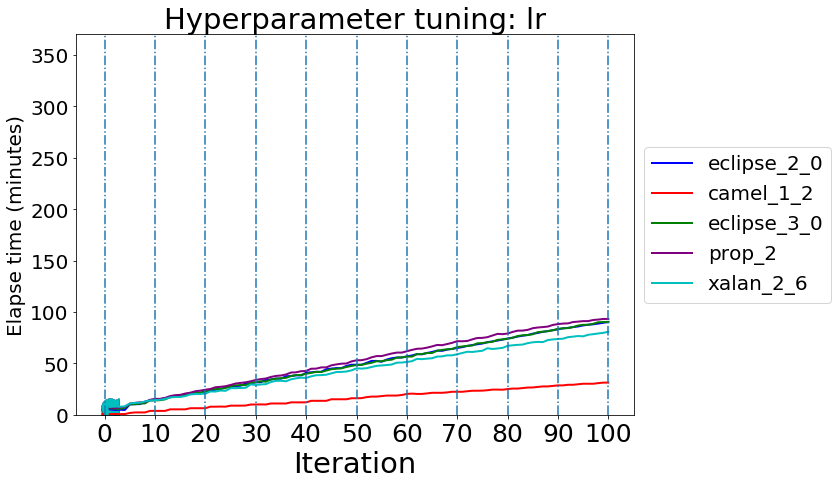

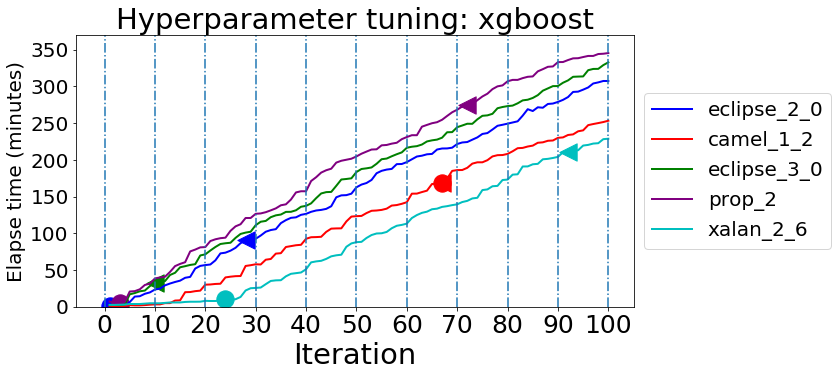

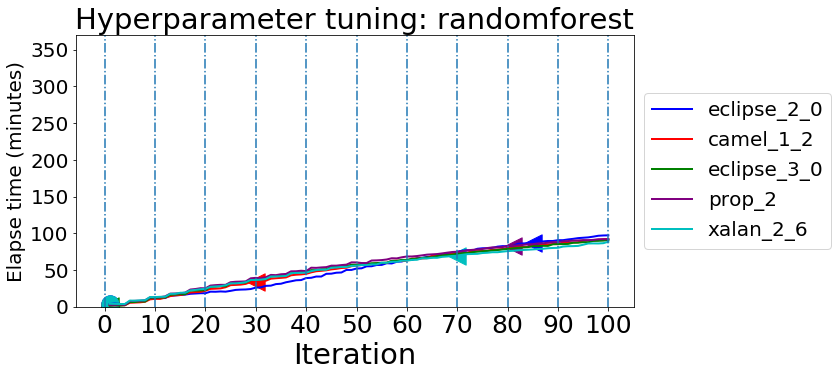

In [264]:
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
colorlist = ['blue','r','g','purple','c']
for al in algorithm_list:
    exps = [key for key in h_all_metrics.keys() if al in key]

    fig1, ax1 = plt.subplots()
    ax1.set_title('Hyperparameter tuning: '+al,fontsize = 29)
    plt.rcParams["figure.figsize"] = (10, 5)

    axes = plt.gca()
    axes.set_ylim([0,370])

    color_idx=0
    for dataset in exps:
        all_metrics = h_all_metrics[dataset]
        df=pd.DataFrame({
            'Iteration_fake':[x+1 for x in list(all_metrics.keys())],
            'Elapse Time':[ round(float(x['PriorElapseTime'])*60,1) for x in all_metrics.values()],
            'AUC_weighted':[ str(x['AUC_weighted']) for x in all_metrics.values()],
            'Algorithm': [ x['Algorithm'] for x in all_metrics.values()]
        })
        df=df.sort_values('Iteration_fake',ascending=True)
        df['Iteration'] = range(1,len(df.index)+1)
        df_perf_max = df.sort_values('AUC_weighted',ascending=False).iloc[0] 

        plt.plot( 'Iteration', 'Elapse Time', data=df, 
                 #marker='o', markerfacecolor='blue', markersize=12, color='skyblue',
                 color = colorlist[color_idx],
                 label = dataset.split('H_')[1].split('_'+al)[0],
                 linewidth=2)

        plt.scatter ( 'Iteration', 'Elapse Time', data=df_perf_max, 
                 marker='<',  s=300,
                     #markerfacecolor='blue', color='skyblue', 
                 color = colorlist[color_idx],
                 label = '')
        
        best_performance = float(df_perf_max['AUC_weighted'])
        df['AUC percentage'] = [ float(x)/float(best_performance) for x in df['AUC_weighted']]
        df_perf_morethan_099 = df.loc[df['AUC percentage']>=0.99].sort_values('Iteration',ascending=True).iloc[0]
        
        plt.scatter ( 'Iteration', 'Elapse Time', data=df_perf_morethan_099, 
                 marker='o',  s=300,
                     #markerfacecolor='blue', color='skyblue', 
                 color = colorlist[color_idx],
                 label = '')
        color_idx= color_idx+1
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
    xlabel ('Iteration',fontsize = 29)
    ylabel ('Elapse time (minutes)',fontsize = 20)

    #plt.axhline(y=threshold, color='r', linestyle='-.')
    for vx in range(0,101,10):
        plt.axvline(x=vx,linestyle='-.')

    plt.xticks(range(0,101,10),fontsize = 25)
    plt.yticks(fontsize = 20)
    #plt.axhline(y=threshold, color='r', linestyle='-.')


In [267]:
h_performance_tb['H_eclipse_2_0_randomforest']

,AUC_weighted,Algorithm,Iteration,PriorElapseTime,TrainTime
Rank 1,0.80006,randomforest,92,1.511,0.009
Rank 2,0.80006,randomforest,87,1.442,0.01
Rank 3,0.80006,randomforest,86,1.44,0.01


In [258]:
print(df_perf_morethan_099)
print(df_perf_max['AUC_weighted'])
print(float(df_perf_morethan_099['AUC_weighted'])/float(best_performance))

Iteration_fake          21
Elapse Time          21.30
AUC_weighted      0.632843
Algorithm          xgboost
Iteration               18
AUC percentage        1.00
Name: 82, dtype: object
0.664293
0.9526564332305173


In [261]:
[ float(x['AUC_weighted'])/float(best_performance) for x in all_metrics.values()][17]

0.9958978944532006

In [97]:

from IPython.display import display, HTML
import pandas as pd
tb = []
for dataset in h_all_metrics.keys():
    all_metrics = h_all_metrics[dataset]
    printed_row = {}
    printed_row['Dataset']=dataset
    idxlist = sorted(all_metrics.keys())
    printed_row['1st'] = extractElapseTime(idxlist[0],all_metrics)
    printed_row['5th'] = extractElapseTime(idxlist[4],all_metrics)
    printed_row['10th'] = extractElapseTime(idxlist[9],all_metrics)
    printed_row['20th'] = extractElapseTime(idxlist[19],all_metrics)    
    printed_row['50th'] = extractElapseTime(idxlist[49],all_metrics)    
    printed_row['100th'] = extractElapseTime(idxlist[99],all_metrics)        
    #row['Iteration']=index
    tb.append(printed_row)

df = pd.DataFrame(tb)

df=df[['Dataset','1st','10th','20th','50th','100th']]
display(HTML(df.to_html(index=False)))
print('\n')

Dataset,1st,10th,20th,50th,100th
H_eclipse_2_0_xgboost,0.02,0.41,0.96,2.74,5.13
H_eclipse_2_0_randomforest,0.08,0.20,0.32,0.88,1.63
H_eclipse_2_0_lr,0.15,0.25,0.41,0.83,1.52
H_camel_1_2_xgboost,0.02,0.06,0.51,2.06,4.23
H_camel_1_2_randomforest,0.04,0.19,0.37,0.94,1.55
H_camel_1_2_lr,0.02,0.07,0.11,0.28,0.53
H_eclipse_3_0_xgboost,0.22,0.64,1.27,3.10,5.61
H_eclipse_3_0_randomforest,0.04,0.21,0.39,0.97,1.52
H_eclipse_3_0_lr,0.12,0.25,0.39,0.82,1.52
H_prop_2_xgboost,0.35,0.68,1.41,3.45,5.98


In [101]:
def calculateImprovement(iteration,all_metrics,bestPerformance):
    # return the absolute performance improvement
    return float(all_metrics[iteration]['AUC_weighted'])/bestPerformance

In [104]:
from IPython.display import display, HTML
import pandas as pd
tb = []
for dataset in h_all_metrics.keys():
    all_metrics = h_all_metrics[dataset]
    bestPerformance=float(h_performance_tb[dataset]['AUC_weighted'][0])

    printed_row = {}
    printed_row['Dataset']=dataset
    idxlist = sorted(all_metrics.keys())
    printed_row['1st'] =  calculateImprovement(idxlist[0],all_metrics ,bestPerformance) 
    printed_row['5th'] =  calculateImprovement(idxlist[4],all_metrics ,bestPerformance) 
    printed_row['10th'] = calculateImprovement(idxlist[9],all_metrics ,bestPerformance) 
    printed_row['20th'] = calculateImprovement(idxlist[19],all_metrics,bestPerformance)     
    printed_row['50th'] = calculateImprovement(idxlist[49],all_metrics,bestPerformance)     
    printed_row['100th']= calculateImprovement(idxlist[99],all_metrics,bestPerformance)         
    
    #row['Iteration']=index
    tb.append(printed_row)

df = pd.DataFrame(tb)

df=df[['Dataset','1st','10th','20th','50th','100th']]
display(HTML(df.to_html(index=False)))
print('\n')

Dataset,1st,10th,20th,50th,100th
H_eclipse_2_0_xgboost,1.00,1.00,0.99,0.98,1.00
H_eclipse_2_0_randomforest,1.00,1.00,1.00,1.00,0.99
H_eclipse_2_0_lr,1.00,1.00,1.00,1.00,1.00
H_camel_1_2_xgboost,0.94,0.88,0.85,0.86,0.88
H_camel_1_2_randomforest,0.99,0.99,0.99,0.99,0.99
H_camel_1_2_lr,1.00,1.00,1.00,1.00,1.00
H_eclipse_3_0_xgboost,0.95,1.00,0.96,1.00,1.00
H_eclipse_3_0_randomforest,1.00,1.00,0.99,1.00,0.99
H_eclipse_3_0_lr,1.00,1.00,1.00,1.00,1.00
H_prop_2_xgboost,0.98,0.98,0.94,0.94,0.99


H_eclipse_2_0_xgboost
0.9956045908396404
0.9985324947589098
0.9909651896860084
0.9828281751530872
0.9989790237951415


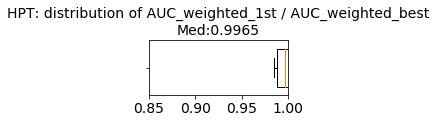

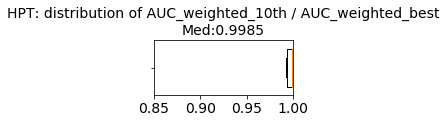

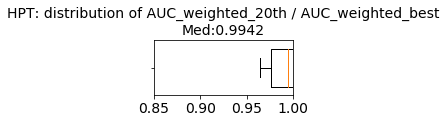

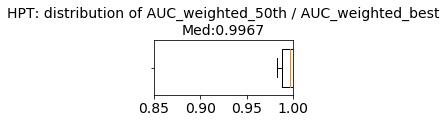

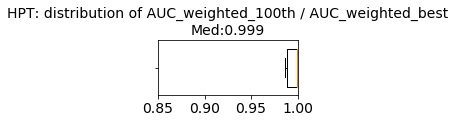

In [108]:

import matplotlib.pyplot as plt
from pylab import *
for row in df.T.iterrows() :
    print(row[1][0])
    if row[0]=='Dataset':
        continue
    auc_weighted_list = row[1]
    plt.rcParams["figure.figsize"] = (2.5, 1)
    fig1, ax1 = plt.subplots()
    title = 'HPT: distribution of AUC_weighted_'+str(row[0]) +' / AUC_weighted_best'

    #print(title)
    bp_dict = ax1.boxplot(auc_weighted_list,vert=False,showfliers=False,widths = 0.7)
    plt.xticks(fontsize=14)
    ax1.set_xlim([0.85,1])
    ax1.set_yticklabels('')
    ax1.set_title(title+'\n'+'Med:' + str(round(median(auc_weighted_list),4)),fontsize = 14)

In [114]:
from IPython.display import display, HTML
import pandas as pd
groupedIterationMap ={}
for dataset in h_all_metrics.keys():
    all_metrics = h_all_metrics[dataset]
    bestPerformance=float(h_performance_tb[dataset]['AUC_weighted'][0])
    tb = []
    
    idxlist = sorted(all_metrics.keys())
    for ita in range(0,idxlist.__len__()) :
        index = idxlist[ita]
        printed_row = {}
        
        #printed_row['Dataset']=dataset.split('defect_')[1]
        printed_row['Iteration'] = ita
        printed_row['POB'] = calculateImprovement(index,all_metrics,bestPerformance)
        tb.append(printed_row)
    groupedIterationMap[dataset.split('H_')[1]] = tb

display(groupedIterationMap)
print('\n')

{'eclipse_2_0_xgboost': [{'Iteration': 0, 'POB': 0.9956045908396404},
  {'Iteration': 1, 'POB': 0.996304587286359},
  {'Iteration': 2, 'POB': 0.989825770765969},
  {'Iteration': 3, 'POB': 0.996995108315863},
  {'Iteration': 4, 'POB': 0.9804664274123821},
  {'Iteration': 5, 'POB': 0.9870328915420058},
  {'Iteration': 6, 'POB': 0.9863328950952872},
  {'Iteration': 7, 'POB': 0.9972189650475547},
  {'Iteration': 8, 'POB': 0.9956602589157754},
  {'Iteration': 9, 'POB': 0.9985324947589098},
  {'Iteration': 10, 'POB': 0.9863257885323763},
  {'Iteration': 11, 'POB': 0.9909509765601867},
  {'Iteration': 12, 'POB': 0.9970649895178197},
  {'Iteration': 13, 'POB': 0.981410415852373},
  {'Iteration': 14, 'POB': 0.9942721102938564},
  {'Iteration': 15, 'POB': 0.9993284298049249},
  {'Iteration': 16, 'POB': 0.9926672115031565},
  {'Iteration': 17, 'POB': 0.9854339148870649},
  {'Iteration': 18, 'POB': 0.9960937592533371},
  {'Iteration': 19, 'POB': 0.9909651896860084},
  {'Iteration': 20, 'POB': 0.99

In [117]:
for al in algorithm_list:
    print([  key for key  in groupedIterationMap.keys() if al in key] ) 

['eclipse_2_0_xgboost', 'camel_1_2_xgboost', 'eclipse_3_0_xgboost', 'prop_2_xgboost', 'xalan_2_6_xgboost']
['eclipse_2_0_randomforest', 'camel_1_2_randomforest', 'eclipse_3_0_randomforest', 'prop_2_randomforest', 'xalan_2_6_randomforest']
['eclipse_2_0_lr', 'camel_1_2_lr', 'eclipse_3_0_lr', 'prop_2_lr', 'xalan_2_6_lr']


xgboost

randomforest

lr



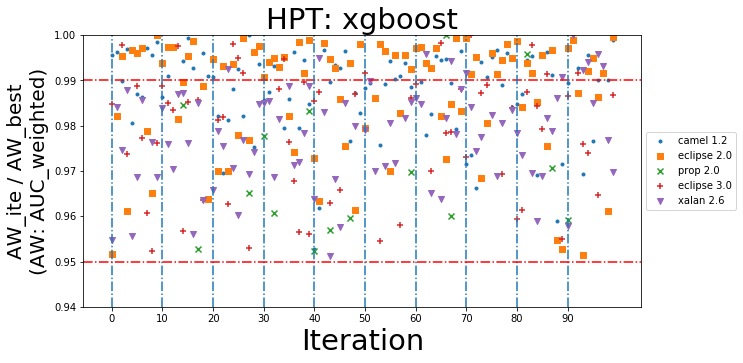

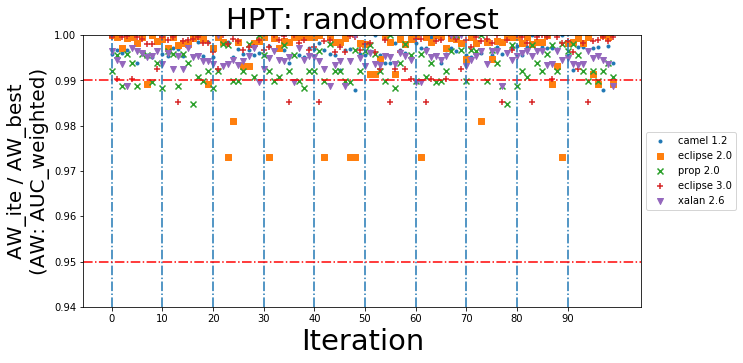

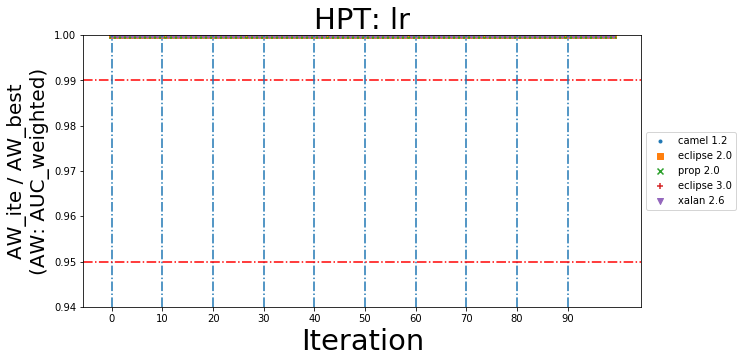

In [132]:
algorithm_list = ['xgboost','randomforest','lr']

for al in algorithm_list:
    print(al+'\n')
    df_eclipse_2_0=pd.DataFrame(groupedIterationMap['eclipse_2_0'+'_'+al])
    df_eclipse_3_0= pd.DataFrame(groupedIterationMap['eclipse_3_0'+'_'+al])
    df_camel_1_2= pd.DataFrame(groupedIterationMap['camel_1_2'+'_'+al])
    df_prop_2= pd.DataFrame( groupedIterationMap['prop_2'+'_'+al])
    df_xalan_2_6= pd.DataFrame(groupedIterationMap['xalan_2_6'+'_'+al])
    
    fig1, ax1 = plt.subplots()
    ax1.set_title('HPT: '+al,fontsize = 29)
    plt.rcParams["figure.figsize"] = (10, 5)
    axes = plt.gca()
    axes.set_ylim([0.94,1])
    threshold = 0.99
    plt.axhline(y=threshold, color='r', linestyle='-.')
    for vx in df_eclipse_2_0['Iteration']:
        if vx % 10 ==0:
            plt.axvline(x=vx,linestyle='-.')
    #text(0.00, threshold, str(threshold), fontsize=25) # draw above, centered
    plt.xticks(range(0,100,10))

    threshold = 0.95
    plt.axhline(y=threshold, color='r', linestyle='-.')
    markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
    plt.scatter( 'Iteration', 'POB', data=df_eclipse_2_0.loc[df_eclipse_2_0['POB']>=threshold],label = 'camel 1.2',marker=markers[1])
    plt.scatter( 'Iteration', 'POB', data=df_eclipse_3_0.loc[df_eclipse_3_0['POB']>=threshold],label = 'eclipse 2.0',marker=markers[2])
    plt.scatter( 'Iteration', 'POB', data=df_camel_1_2.loc[df_camel_1_2['POB']>=threshold],label = 'prop 2.0',marker=markers[3])
    plt.scatter( 'Iteration', 'POB', data=df_prop_2.loc[df_prop_2['POB']>=threshold],label = 'eclipse 3.0',marker=markers[4])
    plt.scatter( 'Iteration', 'POB', data=df_xalan_2_6.loc[df_xalan_2_6['POB']>=threshold],label = 'xalan 2.6',marker=markers[5])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    xlabel ('Iteration',fontsize = 29)
    ylabel ('AW_ite / AW_best\n(AW: AUC_weighted)',fontsize = 20)


In [248]:
def pltSetting(plt,df,label,thresholdhigh,thresholdlow):
    
    axes = plt.gca()
    axes.set_ylim([0.94,1])
    plt.yticks([0.95,0.99,1],fontsize = 12)
    markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
    plt.scatter( 'Iteration', 'POB', data=df.loc[df['POB']>=thresholdhigh],color = 'r',label = label,marker='+',s=30)
    tmp = df.loc[df['POB']>=thresholdlow]
    plt.scatter( 'Iteration', 'POB', data=tmp.loc[tmp['POB']<thresholdhigh],color = 'b',label='',marker='+',s=30)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_visible(False)
    plt.axhline(y=thresholdlow, color='g', linestyle='-.')
    plt.xticks([])
    plt.axhline(y=thresholdhigh, color='g', linestyle='-.')
    for vx in range(0,110,10):
        plt.axvline(x=vx,linestyle='-.',color = 'g')
    return None

lr

xgboost

randomforest



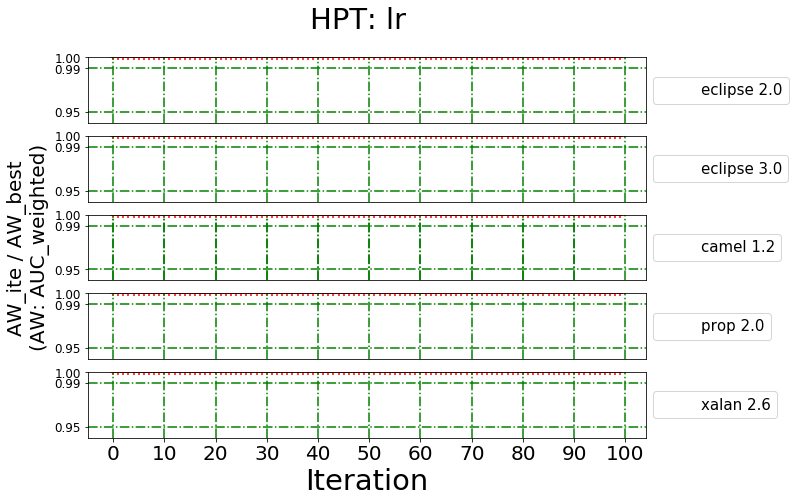

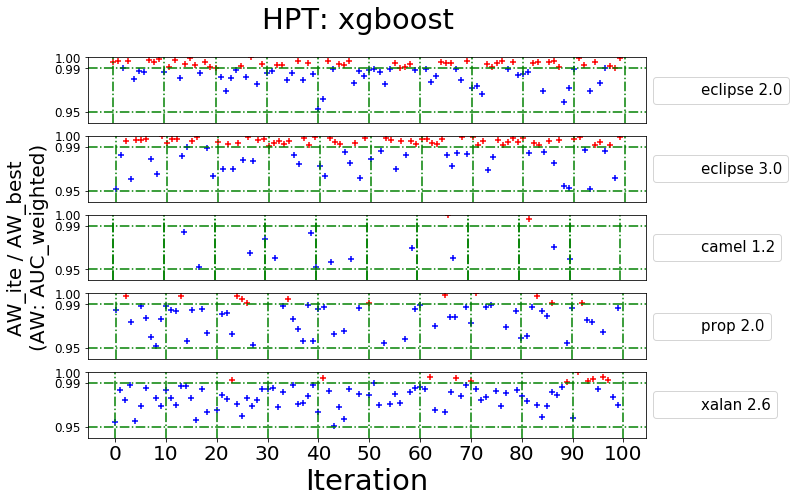

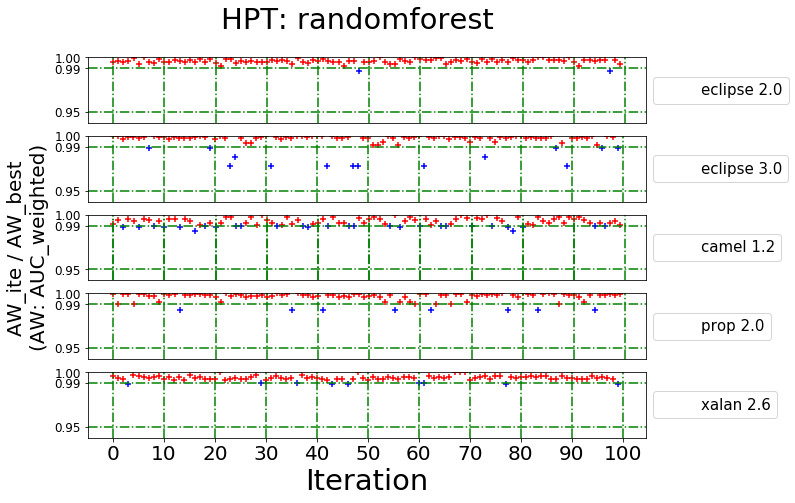

In [250]:
algorithm_list = ['lr', 'xgboost','randomforest']

for al in algorithm_list:
    print(al+'\n')
    df_eclipse_2_0=pd.DataFrame(groupedIterationMap['eclipse_2_0'+'_'+al])
    df_eclipse_3_0= pd.DataFrame(groupedIterationMap['eclipse_3_0'+'_'+al])
    df_camel_1_2= pd.DataFrame(groupedIterationMap['camel_1_2'+'_'+al])
    df_prop_2= pd.DataFrame( groupedIterationMap['prop_2'+'_'+al])
    df_xalan_2_6= pd.DataFrame(groupedIterationMap['xalan_2_6'+'_'+al])

    fig1, ax1 = plt.subplots()
    fig1.suptitle('HPT: '+al,fontsize = 29)

    plt.rcParams["figure.figsize"] = (10, 7)

    thresholdhigh = 0.99
    thresholdlow = 0.95

    plt.subplot(5,1,1)
    pltSetting(plt,df_eclipse_2_0,'eclipse 2.0',thresholdhigh,thresholdlow)

    plt.subplot(5,1,2)
    pltSetting(plt,df_eclipse_3_0,'eclipse 3.0',thresholdhigh,thresholdlow)

    plt.subplot(5,1,3)
    pltSetting(plt,df_camel_1_2,'camel 1.2',thresholdhigh,thresholdlow)
    for vx in range(0,100,10):
        plt.axvline(x=vx,linestyle='-.',color = 'g')
    ylabel ('AW_ite / AW_best\n(AW: AUC_weighted)',fontsize = 20)

    plt.subplot(5,1,4)
    pltSetting(plt,df_prop_2,'prop 2.0',thresholdhigh,thresholdlow)

    plt.subplot(5,1,5)
    pltSetting(plt,df_xalan_2_6,'xalan 2.6',thresholdhigh,thresholdlow)

    plt.xticks(range(0,110,10),fontsize = 20)

    xlabel ('Iteration',fontsize = 29)


Text(0.5, 0, 'Iteration')

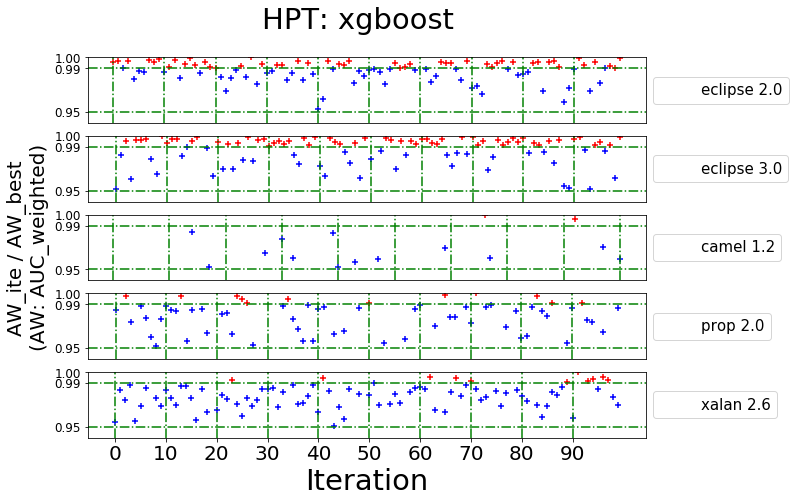

In [243]:
al='xgboost'
df_eclipse_2_0=pd.DataFrame(groupedIterationMap['eclipse_2_0'+'_'+al])
df_eclipse_3_0= pd.DataFrame(groupedIterationMap['eclipse_3_0'+'_'+al])
df_camel_1_2= pd.DataFrame(groupedIterationMap['camel_1_2'+'_'+al])
df_prop_2= pd.DataFrame( groupedIterationMap['prop_2'+'_'+al])
df_xalan_2_6= pd.DataFrame(groupedIterationMap['xalan_2_6'+'_'+al])

fig1, ax1 = plt.subplots()
fig1.suptitle('HPT: '+al,fontsize = 29)

plt.rcParams["figure.figsize"] = (10, 7)

thresholdhigh = 0.99
thresholdlow = 0.95

plt.subplot(5,1,1)
pltSetting(plt,df_eclipse_2_0,'eclipse 2.0',thresholdhigh,thresholdlow)

plt.subplot(5,1,2)
pltSetting(plt,df_eclipse_3_0,'eclipse 3.0',thresholdhigh,thresholdlow)

plt.subplot(5,1,3)
pltSetting(plt,df_camel_1_2,'camel 1.2',thresholdhigh,thresholdlow)

ylabel ('AW_ite / AW_best\n(AW: AUC_weighted)',fontsize = 20)

plt.subplot(5,1,4)
pltSetting(plt,df_prop_2,'prop 2.0',thresholdhigh,thresholdlow)

plt.subplot(5,1,5)
pltSetting(plt,df_xalan_2_6,'xalan 2.6',thresholdhigh,thresholdlow)

plt.xticks(range(0,100,10),fontsize = 20)

xlabel ('Iteration',fontsize = 29)